Images saved to: fer_images


c:\Program Files (x86)\anaconda3\envs\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


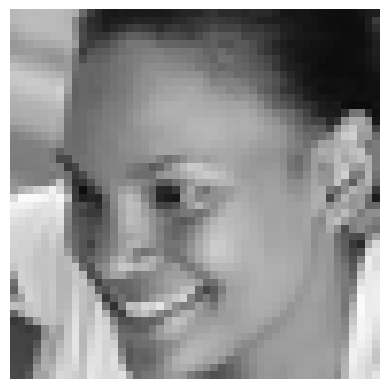

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Convert FER-2013 CSV to PNG Images
def convert_csv_to_images(csv_path, output_dir):

    data = pd.read_csv(csv_path)
    emotion_labels = {
        0: "Angry",
        1: "Disgust",
        2: "Fear",
        3: "Happy",
        4: "Sad",
        5: "Surprise",
        6: "Neutral"
    }
    os.makedirs(output_dir, exist_ok=True)
    for label in emotion_labels.values():
        os.makedirs(os.path.join(output_dir, label), exist_ok=True)

    for index, row in data.iterrows():
        emotion = emotion_labels[row["emotion"]]
        pixels = np.array(row["pixels"].split(), dtype=np.uint8).reshape(48, 48)
        img = Image.fromarray(pixels)
        usage = row["Usage"]
        file_name = f"{usage}_{index}.png"
        img.save(os.path.join(output_dir, emotion, file_name))
    print(f"Images saved to: {output_dir}")

# Load Pre-Trained Model
def load_emotion_model(model_path="emotion_model.h5"):
    model = load_model(model_path)
    return model

# Detect Emotions in an Image
def detect_emotions_in_image(image_path, model):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at {image_path}. Check the file path or file format.")
        return
    
    # Convert to grayscale for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract the face ROI
        roi_gray = gray[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_gray, (48, 48))
        roi_normalized = roi_resized / 255.0  # Normalize pixel values
        roi_reshaped = np.expand_dims(roi_normalized, axis=(0, -1))  # Reshape for the model

        # Predict emotion
        predictions = model.predict(roi_reshaped)
        max_index = np.argmax(predictions[0])
        emotion = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"][max_index]

        # Draw bounding box and label
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Convert the image to RGB and display it
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_image)
    plt.axis('off')
    plt.show()


# Example Usage
csv_path = './fer2013.csv'
output_dir = 'fer_images'
convert_csv_to_images(csv_path, output_dir)  

# Load pre-trained model
model = load_emotion_model("face_model.h5")

# Detect emotions in a sample image
sample_image_path = "./fer_images/Happy/Training_28307.png"  # Image path
detect_emotions_in_image(sample_image_path, model)


In [2]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Example true labels (actual emotions) and predicted labels
true_labels = ['happy', 'sad', 'angry', 'happy', 'surprise', 'neutral']  # actual labels
predicted_labels = ['happy', 'sad', 'angry', 'happy', 'surprise', 'neutral']  # model's predictions

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels,)

# Output the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
